### FASHION 
* This is a notebook that demonstrates how a neural network is trained to make sense of the fashion_mnist data set. A sort of hello world with some added bells and whistles.
* Enjoy the code!

In [2]:
#Classic import statements for our code
import tensorflow as tf
from tensorflow import keras

In [3]:
#This is more or less a formality for you (the reader) to be able to run my code.
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import tensorflow as tf
assert tf.__version__ >= "2.0"


import numpy as np
import os


np.random.seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#saving figures...
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

#This will setup TensorBoard directories for you

root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2021_08_14-21_22_29'

In [4]:
#This is us getting the data as a download.
#Shoutout to Zalando for hooking us up with this data, super cool stuff
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
#This is to split the training data even further and give us a valid set and a training set followed by a scaling down of the pixels
#to make this an easier task - We then convert them to floats by dividing by 255. 
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [6]:
#This is much easier to make sense of than the integers 0-9 for the classes. Useful for predictions of the data
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
# What you came here for - the neural net in question; it has 4 layers, a flatten layer to smoosh the image down into an easier to use array,
# 2 Dense layers that have their perceptrons activated with ReLU activation patterns to help optimize speed of training.
# This is finished off with a dense layer of perceptrons that are activated with the Softmax to help normalize the data that is coming out 
# of this neural net.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [8]:
# Lets compile the model and get it running!
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [9]:
#Checkpoint in case we run into a crash or some unforseen scenario
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=False)
# I would rather not have my computer constantly training this model if it doesnt need to... so with this in mind we will allow for an early
# stop
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
# This will help us go back over the net with some logs later on when we are evaluating the models.
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [10]:
#Train the model!!
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb,tensorboard_cb])
#Test its accuracy to see if its a good model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
   1/1719 [..............................] - ETA: 0s - loss: 2.4328 - accuracy: 0.1250WARNING:tensorflow:From /Users/amitchandna/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7370 - accuracy: 0.7582 - val_loss: 0.5007 - val_accuracy: 0.8288
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4888 - accuracy: 0.8317 - val_loss: 0.4501 - val_accuracy: 0.8450
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4422 - accuracy: 0.8461 - val_loss: 0.4266 - val_accuracy: 0.8580
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4148 - accuracy: 0.8545 - val_loss: 0.3940 - val_accuracy: 0.8688
Epoch 5/100
1719/1719 [===========

Saving figure keras_learning_curves_plot


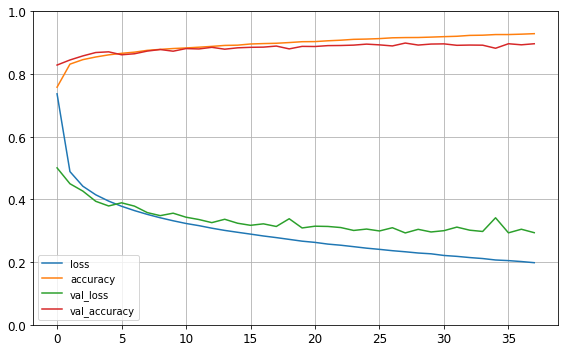

In [11]:
#This is to show a simple chart that helps us see how the model was training, this is more for my own excitement to see how these ANN truly 
# get better over many epochs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()